<a href="https://colab.research.google.com/github/Olga225/ITMO_Statistics_and_ML/blob/main/%D0%9B%D0%A0_PCA_%26_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа: обучение многообразий

# PCA

В этом блоке вам предстоит выполнить задания, касающиеся метода главных компонент (`PCA`).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.



## Задача 1

Вам требуется построить первые две главные компоненты, объяснить сособ их получения, а также их геометрический и статистический смыслы. Для этого:

1.   Составьте минимизируемый функционал.
2.   Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

**Решение:**


1. **Составление минимизируемого функционала.**

При построении двух главных компонент $w_1$ и $w_2$ мы стремимся минимизировать среднюю квадратичную ошибку восстановления исходных данных. Каждый объект $x_i$ аппроксимируется линейной комбинацией $z_{i1}w_1 + z_{i2}w_2$, где $z_{i1}$ и $z_{i2}$ — новые координаты объекта в подпространстве, натянутом на векторы $w_1$ и $w_2$.

Функционал потерь имеет следующий вид:

\begin{equation}
  \begin{aligned}
L(W) &= \frac{1}{n}\sum^n_{i=1}\|x_i - (z_{i1}w_1 + z_{i2}w_2)\|^2 = \\
&= \frac{1}{n}\sum^n_{i=1}(x_i - (z_{i1}w_1 + z_{i2}w_2))^T(x_i - (z_{i1}w_1 + z_{i2}w_2)) = \\
&= \frac{1}{n}\sum^n_{i=1}\left(x_i^Tx_i - 2z_{i1}x_i^Tw_1 - 2z_{i2}x_i^Tw_2 + z_{i1}^2w_1^Tw_1 + 2z_{i1}z_{i2}w_1^Tw_2 + z_{i2}^2w_2^Tw_2\right)
  \end{aligned}
\end{equation}

Учитывая ортонормированность векторов $w_1$ и $w_2$ (т.е. $w_1^Tw_1 = w_2^Tw_2 = 1$ и $w_1^Tw_2 = 0$), выражение упрощается:

$$L(W) = \frac{1}{n}\sum^n_{i=1}\left(x_i^Tx_i - 2z_{i1}x_i^Tw_1 - 2z_{i2}x_i^Tw_2 + z_{i1}^2 + z_{i2}^2\right)$$



2. **Доказательство того, что новые координаты — проекции исходных данных.**

Для нахождения оптимальных значений координат $z_{i1}$ и $z_{i2}$ при фиксированных векторах $w_1$ и $w_2$ продифференцируем функционал потерь по этим переменным и приравняем производные к нулю:

$$\frac{\partial L}{\partial z_{i1}} = \frac{1}{n}\left(-2x_i^Tw_1 + 2z_{i1}\right) = 0 \Rightarrow z_{i1} = x_i^Tw_1,$$

$$\frac{\partial L}{\partial z_{i2}} = \frac{1}{n}\left(-2x_i^Tw_2 + 2z_{i2}\right) = 0 \Rightarrow z_{i2} = x_i^Tw_2.$$

Таким образом, оптимальные значения координат $z_{i1}$ и $z_{i2}$ представляют собой скалярные произведения вектора $x_i$ на соответствующие базисные векторы $w_1$ и $w_2$, что геометрически означает проекцию точки $x_i$ на эти векторы. Это соответствует стандартному определению координат точки в ортонормированном базисе.

3. **Доказательство того, что $w_1$ и $w_2$ — собственные векторы ковариационной матрицы.**

Подставив найденные оптимальные значения $z_{i1} = x_i^Tw_1$ и $z_{i2} = x_i^Tw_2$ обратно в функционал потерь, получим:

\begin{equation}
  \begin{aligned}
L(W) &= \frac{1}{n}\sum^n_{i=1}\left(x_i^Tx_i - 2(x_i^Tw_1)^2 - 2(x_i^Tw_2)^2 + (x_i^Tw_1)^2 + (x_i^Tw_2)^2\right) = \\
&= \frac{1}{n}\sum^n_{i=1}x_i^Tx_i - \frac{1}{n}\sum^n_{i=1}\left((x_i^Tw_1)^2 + (x_i^Tw_2)^2\right) = \\
&= const - \frac{1}{n}\sum^n_{i=1}\left(w_1^Tx_ix_i^Tw_1 + w_2^Tx_ix_i^Tw_2\right) = \\
&= const - \left(w_1^T\left(\frac{1}{n}\sum^n_{i=1}x_ix_i^T\right)w_1 + w_2^T\left(\frac{1}{n}\sum^n_{i=1}x_ix_i^T\right)w_2\right) = \\
&= const - \left(w_1^T\Sigma w_1 + w_2^T\Sigma w_2\right),
  \end{aligned}
\end{equation}

где $\Sigma = \frac{1}{n}\sum^n_{i=1}x_ix_i^T = \frac{1}{n}X^TX$ — выборочная ковариационная матрица.

Для минимизации $L(W)$ при ограничениях $w_1^Tw_1 = 1$, $w_2^Tw_2 = 1$ и $w_1^Tw_2 = 0$ применим метод множителей Лагранжа. Составим функцию Лагранжа:

$$\mathcal{L}(w_1, w_2, \lambda_1, \lambda_2, \mu) = const - (w_1^T\Sigma w_1 + w_2^T\Sigma w_2) - \lambda_1(w_1^Tw_1 - 1) - \lambda_2(w_2^Tw_2 - 1) - \mu w_1^Tw_2.$$

Продифференцируем по $w_1$ и $w_2$:

$$\frac{\partial \mathcal{L}}{\partial w_1} = -2\Sigma w_1 - 2\lambda_1w_1 - \mu w_2 = 0,$$

$$\frac{\partial \mathcal{L}}{\partial w_2} = -2\Sigma w_2 - 2\lambda_2w_2 - \mu w_1 = 0.$$

Умножая первое уравнение слева на $w_2^T$, а второе на $w_1^T$, и учитывая ортогональность $w_1$ и $w_2$, получаем $\mu = 0$. Следовательно:

$$\Sigma w_1 = \lambda_1w_1, \quad \Sigma w_2 = \lambda_2w_2.$$

Это означает, что $w_1$ и $w_2$ являются собственными векторами матрицы $\Sigma$. Согласно теореме, для минимизации ошибки восстановления необходимо выбирать собственные векторы, соответствующие наибольшим собственным значениям. Поэтому $w_1$ соответствует наибольшему собственному значению $\lambda_1$, а $w_2$ — второму по величине собственному значению $\lambda_2$.

4. **Статистический смысл собственных чисел.**

Покажем, что собственные числа $\lambda_1$ и $\lambda_2$ представляют собой выборочные дисперсии новых координат $z_{i1}$ и $z_{i2}$ соответственно.

Для собственного вектора $w_1$, соответствующего собственному числу $\lambda_1$, имеем:

$$\lambda_1 = w_1^T\Sigma w_1 = w_1^T\left(\frac{1}{n}\sum^n_{i=1}x_ix_i^T\right)w_1 = \frac{1}{n}\sum^n_{i=1}w_1^Tx_ix_i^Tw_1 = \frac{1}{n}\sum^n_{i=1}(x_i^Tw_1)^2 = \frac{1}{n}\sum^n_{i=1}z_{i1}^2.$$

Аналогично для $w_2$:

$$\lambda_2 = \frac{1}{n}\sum^n_{i=1}z_{i2}^2.$$

Учитывая, что данные центрированы ($\sum^n_{i=1}x_i = 0$), средние значения новых координат также равны нулю:

$$\bar{z}_1 = \frac{1}{n}\sum^n_{i=1}z_{i1} = \frac{1}{n}\sum^n_{i=1}x_i^Tw_1 = \left(\frac{1}{n}\sum^n_{i=1}x_i\right)^Tw_1 = 0,$$

$$\bar{z}_2 = \frac{1}{n}\sum^n_{i=1}z_{i2} = 0.$$

Следовательно, $\lambda_1$ и $\lambda_2$ представляют собой выборочные дисперсии координат $z_{i1}$ и $z_{i2}$:

$$\lambda_1 = \frac{1}{n}\sum^n_{i=1}(z_{i1} - \bar{z}_1)^2 = \text{Var}(z_1), \quad \lambda_2 = \frac{1}{n}\sum^n_{i=1}(z_{i2} - \bar{z}_2)^2 = \text{Var}(z_2).$$

Таким образом, собственные числа ковариационной матрицы $\Sigma$ имеют ясный статистический смысл: они равны дисперсиям проекций данных на соответствующие главные компоненты.

## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

5. Показать численно (на конкретной матрице) с использованием, например, `numpy`.

**Решение:**

1. **Существование ортогональной матрицы $U$ для диагонализации $XX^T$.**

Рассмотрим матрицу $X$ размера $n \times p$ (в общем случае, хотя для численного примера можно взять $n = p = 3$). Построим симметричную матрицу $A = XX^T$ размера $n \times n$. Симметричность матрицы $A$ следует из того, что:

$$A^T = (XX^T)^T = (X^T)^TX^T = XX^T = A.$$

Согласно спектральной теореме для симметричных матриц, существует ортонормированный базис $\{u_1, u_2, \ldots, u_n\}$ пространства $\mathbb{R}^n$, состоящий из собственных векторов матрицы $A$. Обозначим через $U$ матрицу, столбцами которой являются эти собственные векторы, упорядоченные в соответствии с убывающими собственными значениями $\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_n$.

Матрица $U$ является ортогональной, так как её столбцы образуют ортонормированный базис, то есть $U^TU = I$ и, следовательно, $U^{-1} = U^T$.

В базисе собственных векторов матрица $A$ приводится к диагональному виду:

$$\Lambda = U^{-1}AU = U^TAU = U^TXX^TU,$$

где $\Lambda = \text{diag}(\lambda_1, \lambda_2, \ldots, \lambda_n)$ — диагональная матрица собственных значений.



2. **Связь между собственными векторами $XX^T$ и $X^TX$.**

Из равенства $\Lambda = U^TXX^TU$ умножением слева на $U$ получаем:

$$UU^TXX^TU = U\Lambda.$$

Учитывая, что $UU^T = I$ (так как $U$ ортогональна), имеем:

$$XX^TU = U\Lambda.$$

Это означает, что столбцы матрицы $U$ являются собственными векторами матрицы $XX^T$, а $\Lambda$ содержит соответствующие собственные значения.

Теперь умножим обе части равенства $XX^TU = U\Lambda$ слева на $X^T$:

$$X^TXX^TU = X^TU\Lambda.$$

Перегруппируя, получаем:

$$(X^TX)(X^TU) = (X^TU)\Lambda.$$

Это равенство показывает, что столбцы матрицы $X^TU$ являются собственными векторами матрицы $X^TX$, а $\Lambda$ содержит те же собственные значения (за исключением возможных нулевых, если $n \neq p$).

3. **Ортогональность столбцов $X^TU$ без ортонормированности.**

Покажем, что столбцы матрицы $X^TU$ ортогональны, но не обязательно имеют единичную норму.

Пусть $v_i = X^Tu_i$ — $i$-й столбец матрицы $X^TU$, где $u_i$ — $i$-й столбец матрицы $U$ (собственный вектор $XX^T$). Для двух различных столбцов $v_i$ и $v_j$ ($i \neq j$) вычислим их скалярное произведение:

$$v_i^Tv_j = (X^Tu_i)^T(X^Tu_j) = u_i^TXX^Tu_j = u_i^T(\lambda_j u_j) = \lambda_j u_i^Tu_j = 0,$$

так как собственные векторы $u_i$ и $u_j$ ортогональны при $i \neq j$. Следовательно, столбцы $X^TU$ ортогональны.

Однако норма $i$-го столбца равна:

$$\|v_i\|^2 = v_i^Tv_i = u_i^TXX^Tu_i = u_i^T(\lambda_i u_i) = \lambda_i u_i^Tu_i = \lambda_i,$$

откуда $\|v_i\| = \sqrt{\lambda_i}$. Таким образом, столбцы матрицы $X^TU$ ортогональны, но их нормы равны квадратным корням соответствующих собственных значений и, вообще говоря, не равны единице.

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import random

In [2]:
A = list(range(-10, 11))

# Строим случайную матрицу 3 x 3
X = np.array([random.choices(A, k=3),
              random.choices(A, k=3),
              random.choices(A, k=3)])

print('X = \n', X)

# Симметричная матрица A = XX^T
A = X @ X.T
print('A = \n', A)

# Найдем собственные числа и вектора
eigenvalues, U = np.linalg.eig(A)
print('U = \n', U)

# Проверим ортогональность U (матрица X такая что XX^T = I)
print('Матрица U ортогональна: ', np.allclose(U.T @ U, np.eye(3)))

# Проверим существование диагональной матрицы по заданной формуле:
L = U.T @ X @ X.T @ U
print('Диагональная матрица L: \n', (L).round(5))

X = 
 [[ 6  8  4]
 [ 3 -6 -5]
 [ 1  6  2]]
A = 
 [[116 -50  62]
 [-50  70 -43]
 [ 62 -43  41]]
U = 
 [[-0.74344367  0.57075996 -0.34860375]
 [ 0.48643089  0.819183    0.30384897]
 [-0.45899509 -0.05632296  0.8866517 ]]
Матрица U ортогональна:  True
Диагональная матрица L: 
 [[186.99292   0.        0.     ]
 [  0.       38.11932   0.     ]
 [  0.        0.        1.88776]]


In [3]:
# Покажем верность равенства XX^TU = UL
print('XX^TU = UL: ', np.allclose(X @ X.T @ U, U @ L))

# Покажем верность равенства X^TXX^TU = X^TUL
print('X^TXX^TU = X^TUL: ', np.allclose(X.T @ X @ X.T @ U, X.T @ U @ L))

# Покажем верность равенства (X^TX)(X^TU) = X^TUL
print('(X^TX)(X^TU) = X^TUL: ', np.allclose((X.T @ X) @ (X.T @ U), X.T @ U @ L))

XX^TU = UL:  True
X^TXX^TU = X^TUL:  True
(X^TX)(X^TU) = X^TUL:  True


In [4]:
# Покажем, что столбцы матрицы  X^TU  ортогональны, но не ортонормированы.
XTU = X.T @ U

print(XTU)

ort_flag = True
norm_flag = True
for i in range (0, 3):
  for j in range (0, 3):
    vec_c = XTU.T[i] @ XTU.T[j]
    if i != j:
      ort_flag = (round(vec_c, 5) == 0)
    else:
      norm_flag = (round(vec_c, 5) == 1)

print('Матрица X^TU ортогональна: ', ort_flag)
print('Матрица X^TU ортонормирована: ', norm_flag)

[[ -3.46036444   5.82578581  -0.29342391]
 [-11.62010528  -0.68695609   0.70798635]
 [ -6.32391933  -1.92552109  -1.14035646]]
Матрица X^TU ортогональна:  True
Матрица X^TU ортонормирована:  False


In [5]:
# Получим нормы столбцов X^TU и приведем преобразование к ортогональному.
ort_XTU = np.empty((3, 3))
for i in range (0, 3):
  norm_vec = np.linalg.norm(XTU.T[i])
  ort_XTU[i] = (XTU.T[i] / norm_vec)

otr_XTU = ort_XTU.T

print('X^TU после нормировки :\n', ort_XTU.T)
print('Матрица X^TU ортонормирована: ', np.allclose(ort_XTU.T @ ort_XTU, np.eye(3)))


X^TU после нормировки :
 [[-0.2530517   0.94358698 -0.21356136]
 [-0.84976233 -0.11126444  0.51529041]
 [-0.46245953 -0.31187151 -0.82998033]]
Матрица X^TU ортонормирована:  True


In [6]:
# Здесь полученное X^TU - матрица векторов главных компонент. Следовательно, чтобы получить координаты объектов:

Z = X @ otr_XTU
print('Z - матрица новых координат объектов: \n', Z)

Z - матрица новых координат объектов: 
 [[-10.16624696   3.52392027  -0.47896622]
 [  6.65171656   5.05770515   0.41747511]
 [ -6.27654475  -0.34774271   1.21822042]]


## Практическая часть

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(np.float64(-0.5), np.float64(419.5), np.float64(279.5), np.float64(-0.5))

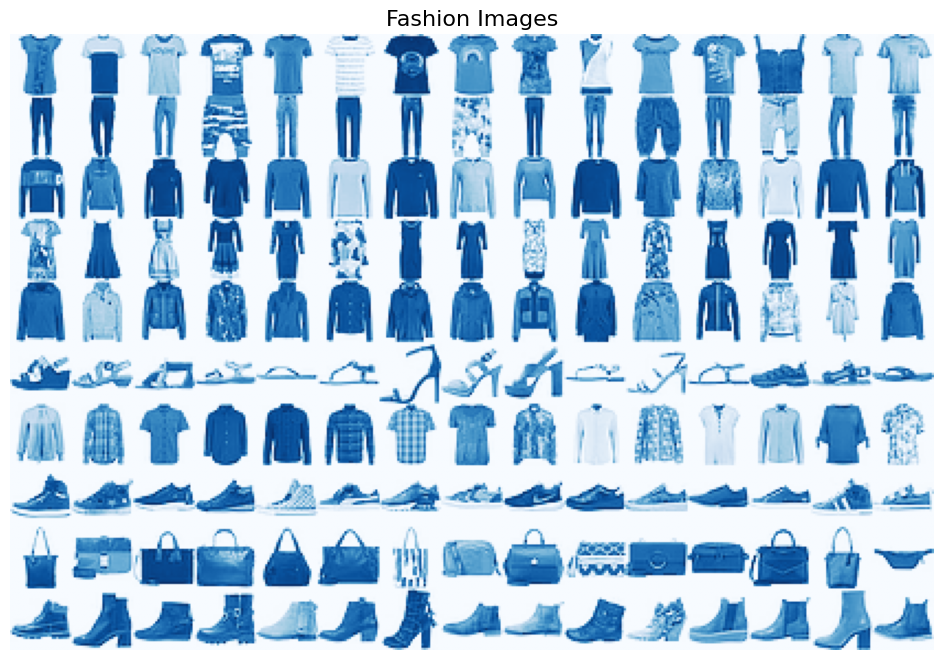

In [8]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [9]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

clf = LogisticRegression(max_iter=2000, tol=0.001, random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('f1-score = ', f1_score(y_test, y_pred, average='weighted'))

f1-score =  0.7381424298005053


**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

**Ваш ответ:**

$F1-score=2\frac{Precision \cdot Recall}{Precision + Recall}$
$Recall=\frac{TP}{TP+FN}$
$Precision = \frac{TP}{TP+FP}$




**Преимущества F1-score:**
- Обеспечивает баланс между точностью и полнотой, не отдавая предпочтения одной из метрик;
- Удобна для сравнения различных моделей;
- Эффективна при работе с несбалансированными классами.

**Недостатки:**
- Не учитывает истинно отрицательные результаты (TN);
- Может быть неоптимальной, когда одна из метрик (точность или полнота) критически важнее другой;
- Не отражает распределение ошибок по классам в многоклассовых задачах без дополнительных параметров агрегации.

**Параметры агрегации в `sklearn.metrics.f1_score`:**

1. **'binary'** (по умолчанию) — применяется только для бинарной классификации.

2. **'micro'** — вычисляет глобальные TP, FP, FN по всем классам, затем вычисляет общий F1-score. Подходит для оценки общей производительности модели без учета различий между классами.

3. **'macro'** — вычисляет F1-score для каждого класса отдельно и возвращает их невзвешенное среднее. Используется, когда все классы равнозначны и важно среднее качество по всем классам.

4. **'weighted'** — аналогично 'macro', но среднее значение взвешивается по количеству объектов в каждом классе. Рекомендуется для несбалансированных датасетов, когда необходимо учесть размеры классов.

5. **'samples'** — вычисляет F1-score для каждого образца отдельно и возвращает среднее. Применяется в задачах многоэтикеточной классификации, где один объект может принадлежать нескольким классам одновременно.

Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

Scale =  50


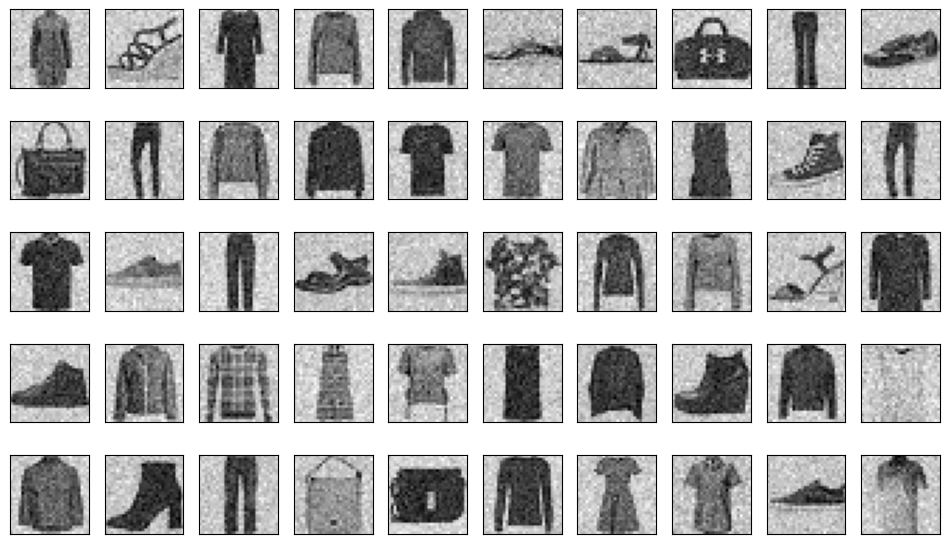

Scale =  100


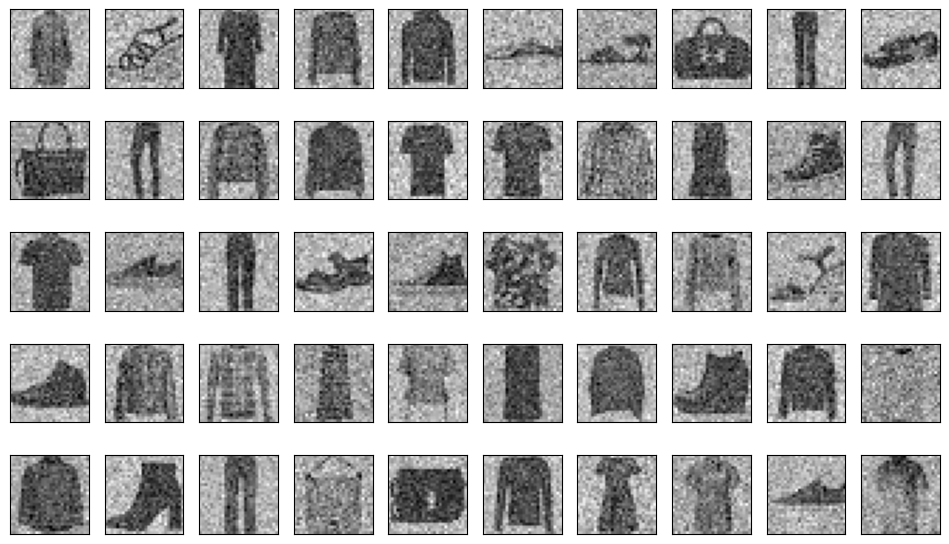

Scale =  150


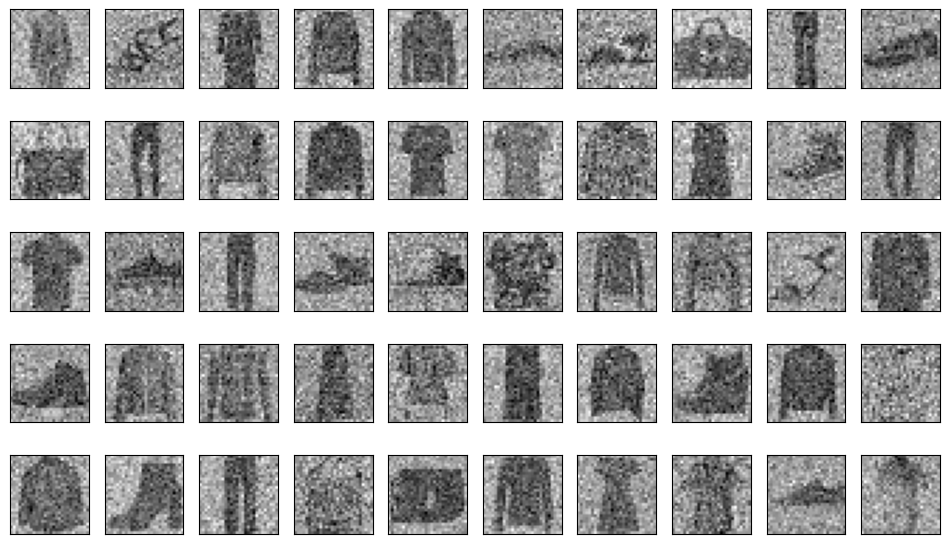

Scale =  200


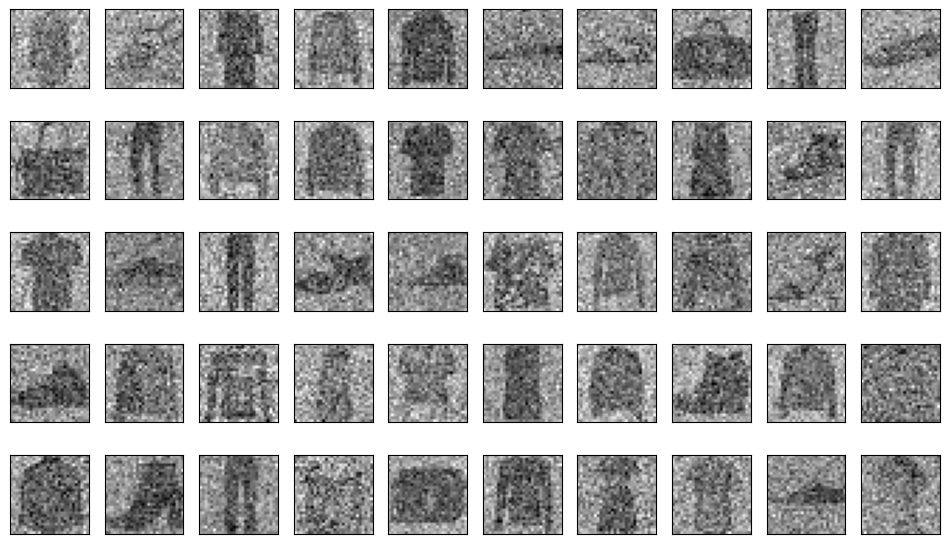

In [12]:
scales = [50, 100, 150, 200]
X_test_noisy_scales = []

for scale in scales:
  print('Scale = ', scale )

  noise = np.random.normal(X_test, scale)
  X_test_noisy = X_test + noise
  X_test_noisy_scales.append(X_test_noisy)

  fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

  for i, ax in enumerate(axes.flat):
      ax.imshow(X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)
  plt.show()

**Выводы:** При увеличении параметра `scale` в функции `np.random.normal()` возрастает дисперсия добавляемого гауссовского шума. Это приводит к тому, что значения пикселей в зашумленных изображениях сильнее отклоняются от исходных значений, что визуально проявляется в увеличении зернистости и искажении структуры изображений. Чем больше `scale`, тем сложнее распознать исходное изображение.

Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [13]:
f_score_without_PCA = []

for i in range(len(scales)):
  y_pred = clf.predict(X_test_noisy_scales[i])
  f_score = f1_score(y_test, y_pred, average='weighted')
  f_score_without_PCA.append(f_score)
  print(f'For scale = {scales[i]}, f1-score = {f_score}')

For scale = 50, f1-score = 0.6307503491168241
For scale = 100, f1-score = 0.5302092938882438
For scale = 150, f1-score = 0.4306638978561862
For scale = 200, f1-score = 0.3808376399777438


**Выводы:** С ростом уровня зашумленности данных наблюдается монотонное снижение метрики F1-score. Это объясняется тем, что добавленный шум искажает информативные признаки объектов, на основе которых логистическая регрессия принимает решения о классификации. При высоком уровне шума сигнал становится менее различимым на фоне шума, что приводит к ухудшению качества предсказаний модели.

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

Scale =  50


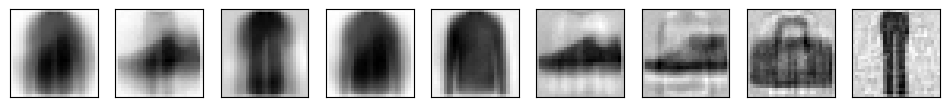

Scale =  100


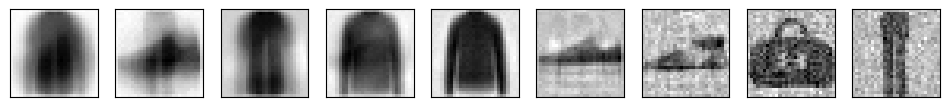

Scale =  150


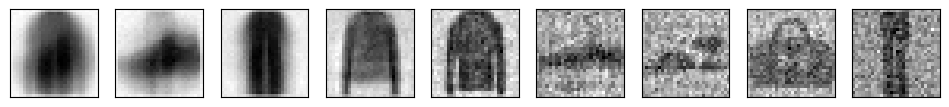

Scale =  200


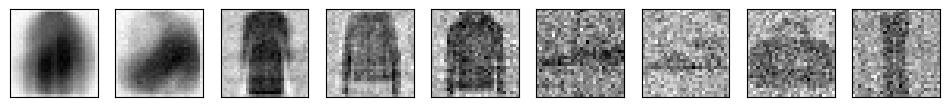

In [14]:
from sklearn.decomposition import PCA
restored_X_test_noisy_scales = []

for s in range(len(scales)):
   print('Scale = ', scales[s])
   restored_X_test_noisy = []

   for explained_variance in range(1, 10, 1):

      pca = PCA(n_components=explained_variance / 10)
      X_reduced = pca.fit_transform(X_test_noisy_scales[s])
      X_restored = pca.inverse_transform(X_reduced)
      restored_X_test_noisy.append(X_restored)

   restored_X_test_noisy_scales.append(restored_X_test_noisy)

   fig, axes = plt.subplots(1, 9, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

   for i, ax in enumerate(axes.flat):
       ax.imshow(restored_X_test_noisy[i % 9][i].reshape(28, 28), cmap=plt.cm.gray_r)
   plt.show()

**Выводы:** Применение PCA для восстановления зашумленных данных демонстрирует эффективность метода в подавлении шума. Механизм работы основан на том, что PCA проецирует данные на подпространство главных компонент, которые соответствуют направлениям максимальной дисперсии в данных. Поскольку шум обычно имеет более равномерное распределение по всем измерениям, а полезный сигнал концентрируется в первых главных компонентах, восстановление через обратное преобразование позволяет частично отфильтровать шум. Наблюдается компромисс между уровнем детализации (который снижается при уменьшении числа компонент) и степенью подавления шума (которая улучшается при меньшем числе компонент).

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [15]:
f_scores_results = []

for s in range(len(scales)):
  print("For scale = ", scales[s])
  for ev in range(1, 10, 1):
     y_pred = clf.predict(restored_X_test_noisy_scales[s][ev-1])
     f_score = f1_score(y_test, y_pred, average='weighted')
     f_scores_results.append([scales[s], (ev / 10), f_score])
     print(f'For explained varience = {ev / 10}, f1-score = {f_score}')

For scale =  50
For explained varience = 0.1, f1-score = 0.06830702691411365
For explained varience = 0.2, f1-score = 0.06830702691411365
For explained varience = 0.3, f1-score = 0.20737526464960004
For explained varience = 0.4, f1-score = 0.20737526464960004
For explained varience = 0.5, f1-score = 0.48960154063638917
For explained varience = 0.6, f1-score = 0.5967689725611905
For explained varience = 0.7, f1-score = 0.6910365097477327
For explained varience = 0.8, f1-score = 0.7484899815407178
For explained varience = 0.9, f1-score = 0.7175043477075913
For scale =  100
For explained varience = 0.1, f1-score = 0.07328165211256968
For explained varience = 0.2, f1-score = 0.07328165211256968
For explained varience = 0.3, f1-score = 0.20721335254795983
For explained varience = 0.4, f1-score = 0.47809331080386724
For explained varience = 0.5, f1-score = 0.6428693080930634
For explained varience = 0.6, f1-score = 0.6944710479902305
For explained varience = 0.7, f1-score = 0.661357645508375

В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперции (таблицы, графики, диаграммы). Сделайте выводы.

In [16]:
print(f_scores_results)

[[50, 0.1, 0.06830702691411365], [50, 0.2, 0.06830702691411365], [50, 0.3, 0.20737526464960004], [50, 0.4, 0.20737526464960004], [50, 0.5, 0.48960154063638917], [50, 0.6, 0.5967689725611905], [50, 0.7, 0.6910365097477327], [50, 0.8, 0.7484899815407178], [50, 0.9, 0.7175043477075913], [100, 0.1, 0.07328165211256968], [100, 0.2, 0.07328165211256968], [100, 0.3, 0.20721335254795983], [100, 0.4, 0.47809331080386724], [100, 0.5, 0.6428693080930634], [100, 0.6, 0.6944710479902305], [100, 0.7, 0.6613576455083754], [100, 0.8, 0.6149356516864489], [100, 0.9, 0.5649044645223729], [150, 0.1, 0.06325530565801728], [150, 0.2, 0.21389751170736998], [150, 0.3, 0.5266141039893498], [150, 0.4, 0.6595285184788902], [150, 0.5, 0.6633038638999261], [150, 0.6, 0.5940658857866795], [150, 0.7, 0.5405611838403628], [150, 0.8, 0.4882128243217543], [150, 0.9, 0.46813896953983347], [200, 0.1, 0.06670963262387944], [200, 0.2, 0.3503607660386565], [200, 0.3, 0.6333022217458044], [200, 0.4, 0.5714608858979973], [20

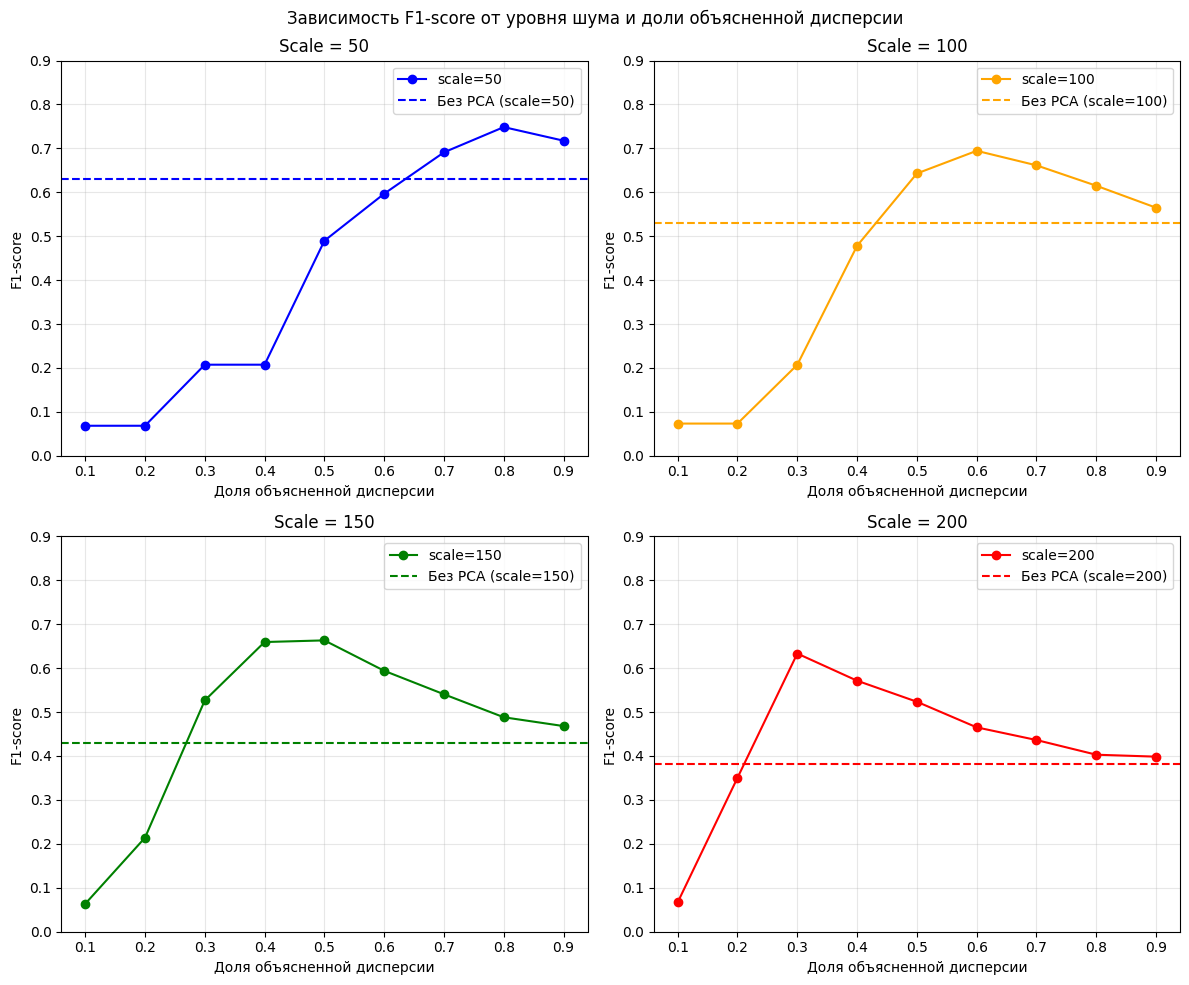

In [27]:
import pandas as pd

df = pd.DataFrame(f_scores_results, columns=['scale', 'ev', 'f_score'])
colors = ['blue', 'orange', 'green', 'red']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, scale in enumerate(sorted(df['scale'].unique())):
    ax = axes[idx]
    subset = df[df['scale'] == scale]
    i = scale // 50 - 1
    
    ax.plot(subset['ev'], subset['f_score'],
             marker='o', label=f'scale={scale}', color = colors[i])
    
    ax.axhline(y=f_score_without_PCA[i], linestyle='--', color = colors[i], 
               label=f'Без PCA (scale={scale})')
    
    ax.set_xlabel('Доля объясненной дисперсии')
    ax.set_ylabel('F1-score')
    ax.set_title(f'Scale = {scale}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_yticks(np.arange(0, 1, 0.1))

plt.suptitle('Зависимость F1-score от уровня шума и доли объясненной дисперсии', 
             fontsize=12)
plt.tight_layout()
plt.show()

**Выводы:**

Анализ результатов показывает, что применение PCA для денойзинга зашумленных данных во всех рассмотренных случаях приводит к улучшению метрики F1-score по сравнению с классификацией на исходных зашумленных данных.

Ключевое наблюдение заключается в том, что оптимальное значение доли объясненной дисперсии зависит от уровня исходной зашумленности: при более высоком уровне шума оптимальная доля объясненной дисперсии оказывается ниже. Это связано с тем, что при восстановлении данных с использованием большего числа главных компонент в восстановленное изображение возвращается больше шума, который был отброшен при понижении размерности. На высоких уровнях зашумленности шум и полезный сигнал становятся менее различимыми, поэтому более агрессивное сжатие (меньше компонент) позволяет лучше отделить сигнал от шума.

С другой стороны, слишком агрессивное сжатие (доля объясненной дисперсии менее 0.2-0.3) приводит к потере важной информации о структуре данных, что также негативно сказывается на качестве классификации. Таким образом, существует оптимальный баланс между сохранением информативности данных и подавлением шума, который зависит от уровня исходной зашумленности.

# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся `t-SNE`.

## Теоретическая часть

Напомним, что расстояние Кульбака--Лейблера между двумя распределенями $P = \{p_1, \ldots, p_n\}$, $Q = \{q_1, \ldots, q_n\}$ вычисляется как
$$
\mathbb{KL}(P|Q) = \sum\limits_{i=1}^np_i \log \frac{p_i}{q_i}.
$$

Пусть перплексия равна $k$. Положите $p_{i|j} = 1/k$ для $k$ ближайших соседей точки $j$ за исключением $j$, $p_{j|j} = 0$, как и остальные вероятности. Положите
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}.
$$

## Задача 1

Вычислите градиент $\mathbb{KL}$ в случае использования `SNE` и `t-SNE`.

**Ваш ответ:**

**Для SNE:**
$$
\mathbb{KL}(P|Q) = \sum\limits_{i, j}p_{ij} \log \frac{p_{ij}}{q_{ij}} = \sum\limits_{i, j}p_{ij} \log p_{ij} - \sum\limits_{i, j}p_{ij} \log q_{ij}.
$$

Первое слагаемое здесь является константой и далее при взятии градиента обратиться в 0. Введем также дополнительные обозначения:

$$
d_{ij} = ||y_i - y_j||,
Z = \sum\limits_{k \neq l} e^{-d_{ij}^2}
$$

Таким образом,

$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial y_i} = \sum\limits_j(\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}} + \frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ji}})(y_i - y_j) = 2\sum\limits_j(\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}})(y_i - y_j).
$$

$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl} \frac{\partial log(q_{kl})}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl} \frac{\partial log(q_{kl}Z) - log(Z)}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl}(\frac{\partial log(e^{-d_{kl}^2})}{\partial d_{ij}} - \frac{1}{Z}\frac{\partial Z}{\partial d_{ij}}) =
2p_{ij} + \sum\limits_{k \neq l}p_{kl}\frac{1}{Z}\frac{\partial \sum(e^{-d_{kl}^2})}{\partial d_{ij}} =
2p_{ij} - \sum\limits_{k \neq l}p_{kl} \frac{e^{-d_{ij}^2}}{Z} =
2p_{ij} - 2q_{ij} = 2(p_{ij} - q_{ij})
$$

Тогда,
$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial y_i} = 4\sum\limits_j(p_{ij} - q_{ij})(y_i - y_j)
$$

**Для T-SNE:**

$$
\mathbb{KL}(P|Q) = \sum\limits_{i, j}p_{ij} \log \frac{p_{ij}}{q_{ij}} = \sum\limits_{i, j}p_{ij} \log p_{ij} - \sum\limits_{i, j}p_{ij} \log q_{ij}.
$$

Первое слагаемое здесь является константой и далее при взятии градиента обратиться в 0. Введем также дополнительные обозначения:

$$
d_{ij} = ||y_i - y_j||,
Z = \sum\limits_{k \neq l} \frac{1}{1 + d_{kl}^2}
$$

Таким образом,

$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial y_i} = \sum\limits_j(\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}} + \frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ji}})(y_i - y_j) = 2\sum\limits_j(\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}})(y_i - y_j).
$$

$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl} \frac{\partial log(q_{kl})}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl} \frac{\partial log(q_{kl}Z) - log(Z)}{\partial d_{ij}} =
- \sum\limits_{k \neq l}p_{kl}(\frac{1}{q_{kl}Z}\frac{\partial \frac{1}{1 + d_{kl}^2}}{\partial d_{ij}} - \frac{1}{Z}\frac{\partial Z}{\partial d_{ij}}) =
\frac{2p_{ij}}{q_{ij}Z(1 + d_{ij}^2)^2} - 2\sum\limits_{k \neq l}p_{kl}\frac{\frac{1}{(1 + d_{kl}^2)^2}}{Z} =
\frac{2p_{ij}}{(1 + d_{ij}^2)} - 2\frac{q_{ij}}{(1 + d_{ij}^2)} =
2\frac{(p_{ij} - q_{ij})}{(1 + d_{ij}^2)}
$$

Тогда,
$$
\frac{\partial \mathbb{KL}(P|Q)}{\partial y_i} = 4\sum\limits_j\frac{(p_{ij} - q_{ij})(y_i - y_j)}{1 + ||y_i - y_j||^2}
$$

## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы `SNE` и `t-SNE`. Проведите численные эксперименты для следующего набора данных:

In [18]:
import pandas as pd

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889


**НАГЛЯДНО** представьте получаемые результаты (визуализации, время работы, анимация, etc) в зависимости от используемого метода (`SNE`/`t-SNE`) и значения перплексии. Сделайте выводы.

**Замечание:** В качестве способа минимизации функции потерь можно использовать либо самостоятельно реализованный градиентный спуск, либо некоторую библиотечную оптимизацию, использующую вычисленные вами в предыдущей задаче градиенты функций потерь. Например, на основе `scipy.optimize.minimize`.

In [19]:
# @title Пример использования scipy.optimize.minimize
import numpy as np
from scipy.optimize import minimize

# Пусть минимизируемая функция имеет вид $(x-2)^2 + (y+1)^2$
# Начальная точка
x0 = np.array([5,8])

# Для вычисления точки минимума в функцию minimize подается
# cама минимизируемая функция и ее градиент
def f_and_grad(point):
  x,y = point
  f = (x-2)**2 + (y+1)**2
  grad = np.array([2*(x-2), 2*(y+1)])
  return f, grad


# Чтобы функция minimize использовала именно наш градиент
# устанавливаем соответствующий параметр jac=True
minimize(f_and_grad, x0, jac=True)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 6.2960960997952e-29
        x: [ 2.000e+00 -1.000e+00]
      nit: 4
      jac: [ 1.510e-14 -4.885e-15]
 hess_inv: [[ 9.500e-01 -1.500e-01]
            [-1.500e-01  5.500e-01]]
     nfev: 5
     njev: 5

In [20]:
import pandas as pd
import numpy as np

k = 10
n_dimensions = 2

In [21]:
# Вычисляем попарную близость (pairwise affinities).
# На вход принимается данные в формате np.array и perplexity (по умолчанию 30)
# Возвращается np.array - массив значений p_i|j

def compute_pairwise_affinities(X, k = 30):
  n = len(X)
  pair_affs = np.zeros((n, n)) # близость i-ой точки к j-ой в многомерном пространстве
  diffs = np.zeros((n, n)) # расстояния между точками в многомерном пространстве

  # Расстояния между точками
  for i in range(n):
    for j in range(n):
      if i != j:
        diffs[i, j] = np.linalg.norm(X[i] - X[j])
      else:
        diffs[i, j] = np.inf

  # Вероятности как p_i|j = 1/k для k ближайших соседей; 0 для остальных
  for i in range(n):
    closest_indices = np.argsort(diffs[i])[:k]
    pair_affs[i, closest_indices] = 1.0 / k

  return pair_affs


pair_affs = compute_pairwise_affinities(np.array(data), 20)
print(pair_affs)

[[0.   0.   0.   ... 0.05 0.   0.05]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.05 0.   0.  ]
 ...
 [0.   0.   0.05 ... 0.   0.   0.  ]
 [0.   0.   0.05 ... 0.05 0.   0.  ]
 [0.05 0.   0.   ... 0.   0.   0.  ]]


In [22]:
# Вычисляем совместную вероятность p_ij
# На вход принимается массив попарных близостей P_i|j в формате np.array
# Возвращается массив совместных вероятностей p_ij в формате np.array

def set_pij(pair_affs):
  n = pair_affs.shape[0]
  p_ij = np.zeros(shape = pair_affs.shape)

  for i in range (n):
    for j in range (n):
      p_ij[i, j] = (pair_affs[i, j] + pair_affs[j, i]) / (2 * n)

  return p_ij

p_ij = set_pij(pair_affs)
print(p_ij)

[[0.         0.         0.         ... 0.00041667 0.         0.00083333]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00083333 0.00041667 0.        ]
 ...
 [0.00041667 0.         0.00083333 ... 0.         0.00041667 0.        ]
 [0.         0.         0.00041667 ... 0.00041667 0.         0.        ]
 [0.00083333 0.         0.         ... 0.         0.         0.        ]]


In [28]:
# Инициализируем начальное решение y
# На вход принимает число объектов n и число измерений n_dimensions (по умолчанию 2)
# Возвращает массив случайных значений y

def initialize_y(n, n_dimensions = 2):
  return np.random.normal(0,scale=1e-2,size=(n,n_dimensions))

X = np.array(data)
initial_y = initialize_y(X.shape[0])
print(initial_y[:7])


[[ 0.00159455 -0.00323643]
 [ 0.00285517 -0.00491245]
 [-0.00745622 -0.0038154 ]
 [-0.01082557 -0.00704716]
 [-0.01427295 -0.02180922]
 [-0.01530202  0.02009024]
 [-0.00780794 -0.00737403]]


In [24]:
# Вычисляем близости q_ij в маломерном пространстве
# На вход принимается массив точек в Y как Np.array и метод как строка ('SNE', 'T-SNE'), по умолчанию 'T-SNE'
# Возвращает массив близостей q_ij

def compute_low_dim_affinities(Y, SNE_method = 'T-SNE'):
  n = len(Y)
  q_ij = np.zeros((n, n)) # близость i-ой точки к j-ой в маломерном пространстве

  # Расстояния между точками
  for i in range(n):
    for j in range(n):
      diff = np.linalg.norm(Y[i] - Y[j])

      if SNE_method == 'SNE':
        q_ij[i, j] = np.exp(-(diff ** 2))
      if SNE_method == 'T-SNE':
        q_ij[i, j] = 1.0 / (1 + (diff ** 2))

  np.fill_diagonal(q_ij, 0)
  q_ij = q_ij / q_ij.sum()

  return q_ij

q_ij = compute_low_dim_affinities(initial_y)
print(q_ij)

[[0.00000000e+00 1.00013743e-08 9.99983108e-09 ... 1.00018288e-08
  1.00024781e-08 1.00030890e-08]
 [1.00013743e-08 0.00000000e+00 1.00042495e-08 ... 1.00039011e-08
  1.00029878e-08 9.99906591e-09]
 [9.99983108e-09 1.00042495e-08 0.00000000e+00 ... 1.00014220e-08
  1.00038106e-08 9.99973524e-09]
 ...
 [1.00018288e-08 1.00039011e-08 1.00014220e-08 ... 0.00000000e+00
  1.00003689e-08 9.99699411e-09]
 [1.00024781e-08 1.00029878e-08 1.00038106e-08 ... 1.00003689e-08
  0.00000000e+00 1.00035029e-08]
 [1.00030890e-08 9.99906591e-09 9.99973524e-09 ... 9.99699411e-09
  1.00035029e-08 0.00000000e+00]]


In [29]:
# Вычисляем минимизируемую функцию и градиент
# На вход принимаются массивы p_ij, q_ij, Y и метод как строка ('SNE', 'T-SNE'), по умолчанию 'T-SNE'
# Вовзращает значение KL и градиент как одномерный массив

def compute_KL_and_gradient(Y, p_ij, method = 'T-SNE'):
  n = len(p_ij)
  Y = Y.reshape(n, 2)
  m = Y.shape[1]

  q_ij = compute_low_dim_affinities(Y)


  gradient = np.zeros((n, m))

  KL = np.sum(p_ij * np.log((p_ij + 10 ** (-22)) / (q_ij + 10 ** (-22))))

  for i in range(n):
    grad_i = np.zeros(m)
    for j in range(n):
      if i != j:
        if method == 'SNE':
          grad_ij = 4 * (p_ij[i, j] - q_ij[i, j]) * (Y[i] - Y[j])

        if method == 'T-SNE':
          d_ij = (np.linalg.norm(Y[i] - Y[j]))**2
          grad_ij = 4 * (p_ij[i, j] - q_ij[i, j]) * (Y[i] - Y[j]) * ((1 + d_ij) ** (-1))

        grad_i += grad_ij

    gradient[i] = grad_i

  return KL, gradient.ravel()

KL, gradient = compute_KL_and_gradient(initial_y.ravel(), p_ij)
print(KL)
print(gradient[:7])


0.9235167262581959
[-4.02750956e-05 -1.29526842e-04  1.97356186e-05 -6.22362594e-06
 -1.78252306e-04  2.54578431e-04 -2.98721076e-04]


In [30]:
from scipy.optimize import minimize

def minimize_gradient(p_ij, method, initial_y):
  return minimize(compute_KL_and_gradient, initial_y.ravel(), args=(p_ij, method,), jac=True)

result = minimize_gradient(p_ij, 'T-SNE', initial_y)
print(result)
result = result.x.reshape(initial_y.shape[0], 2)
print(result[:7])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.26557662588736175
        x: [ 2.385e+00  2.027e+00 ...  2.766e+00  1.666e+00]
      nit: 231
      jac: [-9.611e-07  5.341e-06 ...  2.680e-07 -3.086e-06]
 hess_inv: [[ 7.547e+01  3.234e+00 ...  3.967e+01 -5.339e+00]
            [ 3.234e+00  3.121e+01 ...  1.171e+00  1.769e+01]
            ...
            [ 3.967e+01  1.171e+00 ...  5.416e+01 -1.041e+01]
            [-5.339e+00  1.769e+01 ... -1.041e+01  4.317e+01]]
     nfev: 242
     njev: 242
[[ 2.3849217   2.02733785]
 [-3.1496632  -0.05365432]
 [ 0.62796059 -0.63882387]
 [ 0.57602224 -0.60346352]
 [-0.45358117 -1.46068855]
 [ 2.74505146  1.80942214]
 [ 0.84498029 -0.17040396]]


In [31]:
def custom_SNE_TSNE(k, method):
  X = np.array(data)
  # Найдем p_i|j
  pair_affs = compute_pairwise_affinities(np.array(data), k)
  # Найдем p_ij
  p_ij = set_pij(pair_affs)
  # Зададим начальное положение Y
  initial_y = initialize_y(X.shape[0])
  # Минимизируем функцию и найдем результат
  result = minimize_gradient(p_ij, method, initial_y)
  result = result.x.reshape(initial_y.shape[0], 2)

  return result

In [32]:
import time
SNE_TSNE_results = []

for method in ['SNE', 'T-SNE']:
  for k in [5, 20, 30, 50]:
    start_time = time.time()
    res = custom_SNE_TSNE(k, method)
    end_time = time.time()
    execution_time = end_time - start_time
    SNE_TSNE_results.append([method, k, execution_time, res])

<Figure size 1200x600 with 0 Axes>

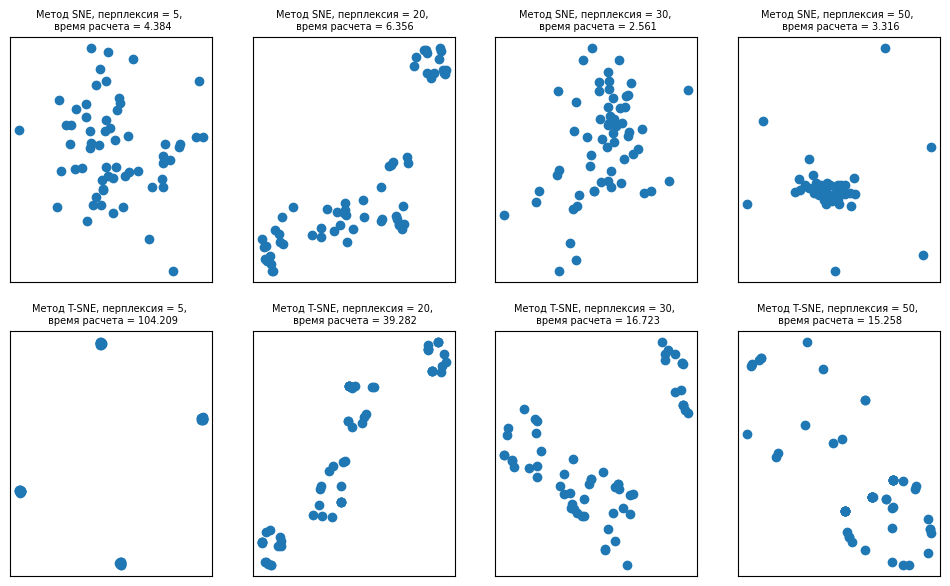

In [33]:
import pandas as pd

plt.figure(figsize=(12, 6))
df = pd.DataFrame(SNE_TSNE_results, columns=['method', 'k', 'execution_time', 'result'])

fig, axes = plt.subplots(2, 4, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
  r = SNE_TSNE_results[i]
  ax.scatter(r[3][:, 0], r[3][:, 1])
  ax.set_title(f'Метод {r[0]}, перплексия = {r[1]}, \n время расчета = {round(r[2], 3)}', fontdict = {'fontsize' : 7} )
plt.show()

## Задача 2.2

Используя набор данных из Задачи 2.1 и [библиотечную реализацию t-SNE](https://opentsne.readthedocs.io/en/latest/api/sklearn.html), произведите численные эксперименты. Обратите особое внимание на следующие параметры: `perplexity, early_exaggeration, exaggeration, initialization, dof`. Сравните время работы и получаемые результаты с результатами Задачи 2.1. Сделайте выводы.

In [34]:
!pip install -q openTSNE

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from openTSNE import TSNE as openTSNE
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm
import time
import seaborn as sns
sns.set(style="whitegrid")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 30.8 MB/s eta 0:00:0000:0100:01


In [35]:
X = np.array(data)

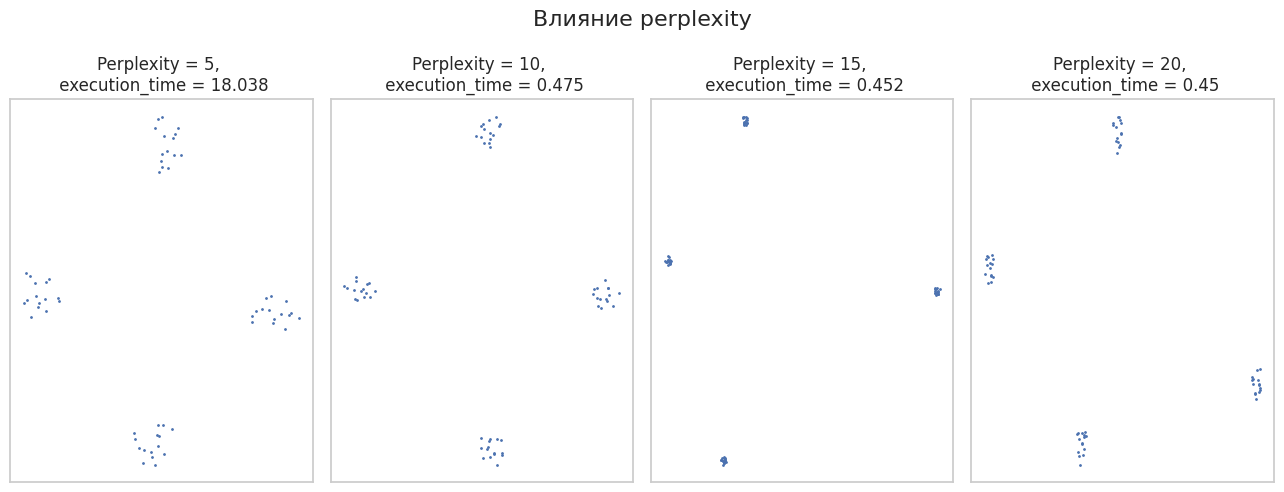

In [36]:
def experiment_perplexity(X, perplexities):
    #perplexities = [5, 10, 15, 20]

    fig, axes = plt.subplots(1, 4, figsize=(13, 5), subplot_kw={'xticks': [], 'yticks': []})
    axes = axes.ravel()

    for i, perplexity in enumerate(perplexities):
      start_time = time.time()
      tsne = openTSNE(
            n_components=2,
            perplexity=perplexity,
            random_state=42)

      X_embedded = tsne.fit(X)
      X_embedded = X_embedded.transform(X)
      end_time = time.time()
      execution_time = end_time - start_time

      axes[i].scatter(X_embedded[:, 0], X_embedded[:, 1], s = 1)
      axes[i].set_title(f'Perplexity = {perplexity}, \n execution_time = {round(execution_time, 3)}')

    plt.suptitle(f'Влияние perplexity', fontsize=16)
    plt.tight_layout()
    plt.show()

experiment_perplexity(X, [5, 10, 15, 20])


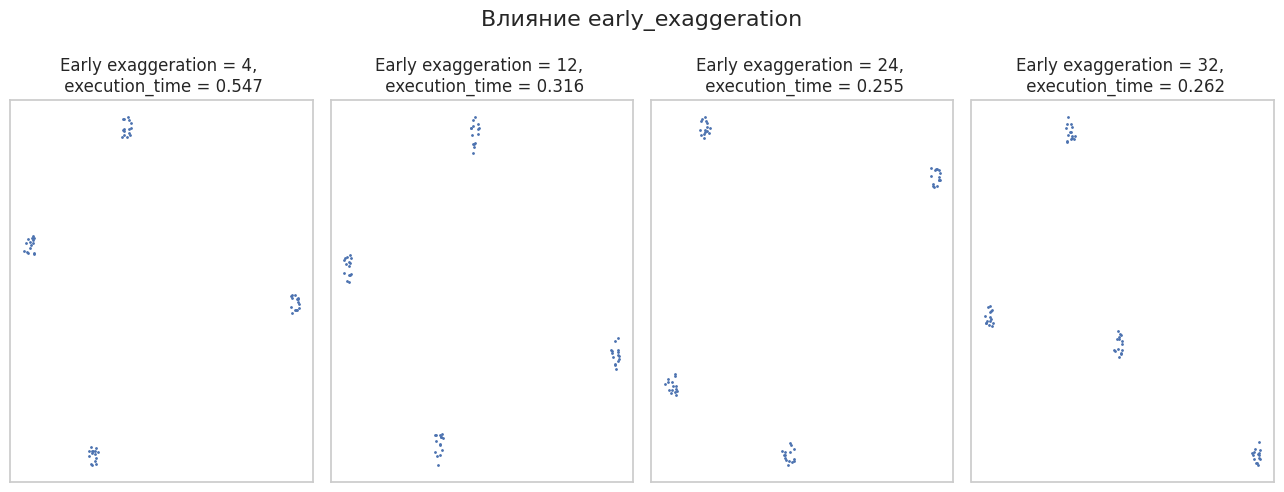

In [37]:
def experiment_early_exaggeration(X, early_exaggerations):
    #early_exaggerations = [4, 12, 24, 32]

    fig, axes = plt.subplots(1, 4, figsize=(13, 5), subplot_kw={'xticks': [], 'yticks': []})
    axes = axes.ravel()

    for i, early_ex in enumerate(early_exaggerations):
        start_time = time.time()
        tsne = openTSNE(
            n_components=2,
            perplexity=19,
            early_exaggeration=early_ex,
            random_state=42
        )

        X_embedded = tsne.fit(X)
        X_embedded = X_embedded.transform(X)
        end_time = time.time()
        execution_time = end_time - start_time

        axes[i].scatter(X_embedded[:, 0], X_embedded[:, 1], s = 1)
        axes[i].set_title(f'Early exaggeration = {early_ex}, \n execution_time = {round(execution_time, 3)}')

    plt.suptitle(f'Влияние early_exaggeration', fontsize=16)
    plt.tight_layout()
    plt.show()

experiment_early_exaggeration(X, [4, 12, 24, 32])

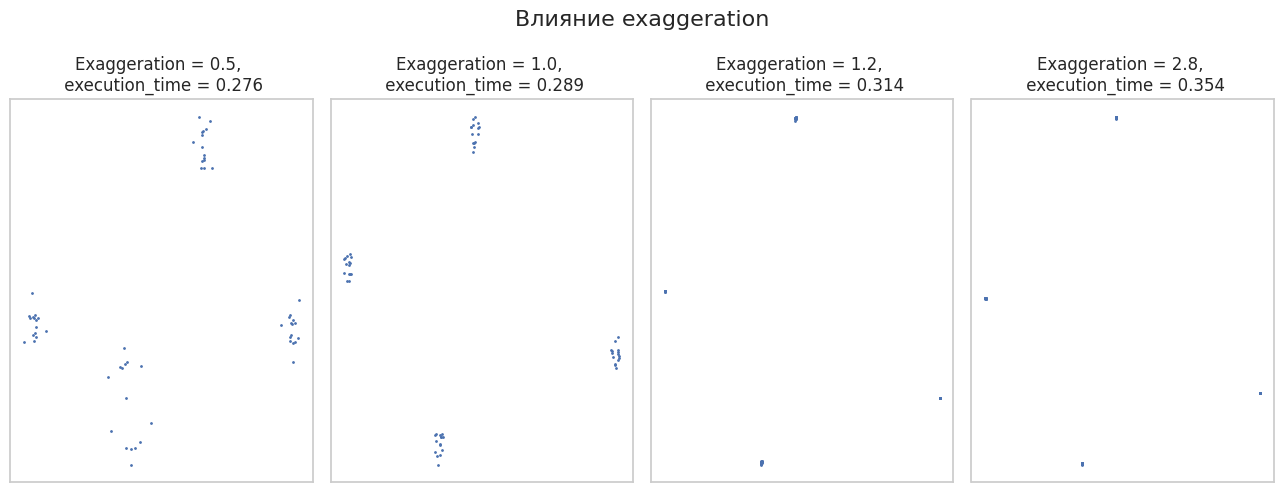

In [38]:
def experiment_exaggeration(X, exaggerations):
    #exaggerations = [0.5, 1.0, 1.2, 2.8]

    fig, axes = plt.subplots(1, 4, figsize=(13, 5), subplot_kw={'xticks': [], 'yticks': []})
    axes = axes.ravel()

    for i, exaggeration in enumerate(exaggerations):
        start_time = time.time()
        tsne = openTSNE(
            n_components=2,
            perplexity=19,
            exaggeration=exaggeration,
            random_state=42
        )

        X_embedded = tsne.fit(X)
        X_embedded = X_embedded.transform(X)
        end_time = time.time()
        execution_time = end_time - start_time

        axes[i].scatter(X_embedded[:, 0], X_embedded[:, 1], s = 1)
        axes[i].set_title(f'Exaggeration = {exaggeration}, \n execution_time = {round(execution_time, 3)}')

    plt.suptitle(f'Влияние exaggeration', fontsize=16)
    plt.tight_layout()
    plt.show()

experiment_exaggeration(X, [0.5, 1.0, 1.2, 2.8])

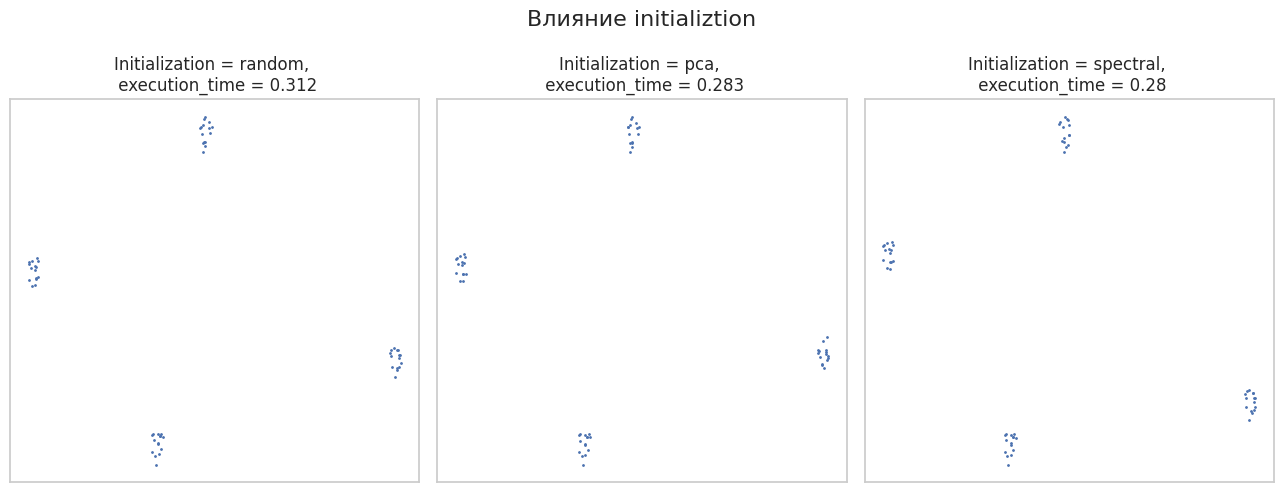

In [39]:
def experiment_initialization(X):
    initializations = ['random', 'pca', 'spectral']

    fig, axes = plt.subplots(1, 3, figsize=(13, 5), subplot_kw={'xticks': [], 'yticks': []})
    axes = axes.ravel()

    for i, init in enumerate(initializations):
        start_time = time.time()
        tsne = openTSNE(
            n_components=2,
            perplexity=19,
            random_state=42,
            initialization = init
        )

        X_embedded = tsne.fit(X)
        X_embedded = X_embedded.transform(X)
        end_time = time.time()
        execution_time = end_time - start_time

        axes[i].scatter(X_embedded[:, 0], X_embedded[:, 1], s = 1)
        axes[i].set_title(f'Initialization = {init}, \n execution_time = {round(execution_time, 3)}')

    plt.suptitle(f'Влияние initializtion', fontsize=16)
    plt.tight_layout()
    plt.show()

experiment_initialization(X)

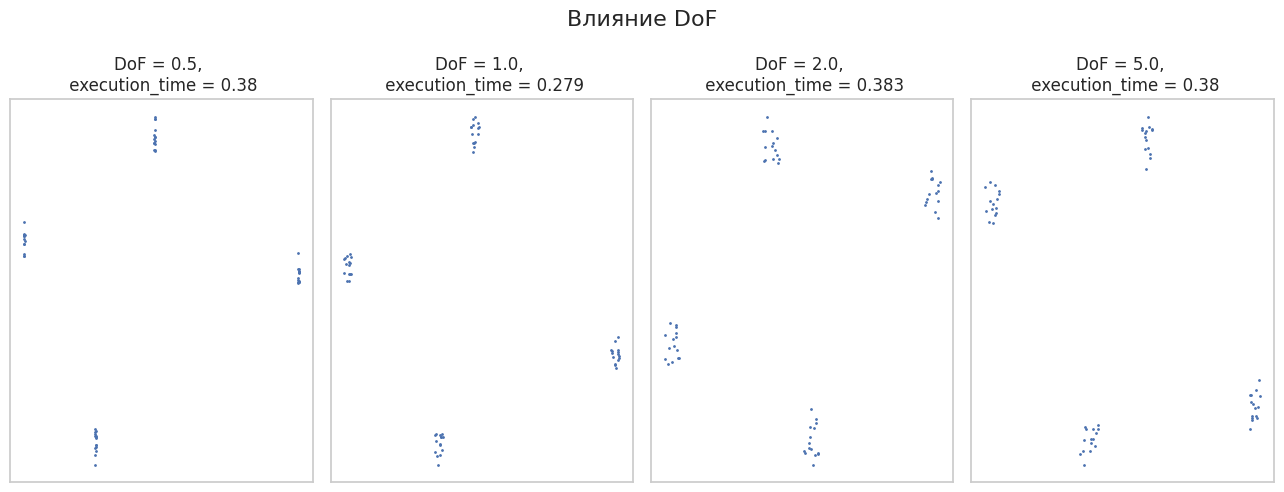

In [40]:
def experiment_dof(X, dofs):
    #dofs = [0.5, 1.0, 2.0, 5.0]

    fig, axes = plt.subplots(1, 4, figsize=(13, 5), subplot_kw={'xticks': [], 'yticks': []})
    axes = axes.ravel()

    for i, dof in enumerate(dofs):
        start_time = time.time()
        tsne = openTSNE(
            n_components=2,
            perplexity=19,
            random_state=42,
            dof = dof
        )

        X_embedded = tsne.fit(X)
        X_embedded = X_embedded.transform(X)
        end_time = time.time()
        execution_time = end_time - start_time

        axes[i].scatter(X_embedded[:, 0], X_embedded[:, 1], s = 1)
        axes[i].set_title(f'DoF = {dof}, \n execution_time = {round(execution_time, 3)}')

    plt.suptitle(f'Влияние DoF', fontsize=16)
    plt.tight_layout()
    plt.show()

experiment_dof(X, [0.5, 1.0, 2.0, 5.0])

## Задача 3

Проверьте свои выводы о влиянии рассмотренных в Задаче 2.2 параметров на результат, используя более объемный, как с точки зрения количества объектов, так и с точки зрения количества признаков, датасет на свой выбор.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
from tensorflow.keras.datasets import mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)


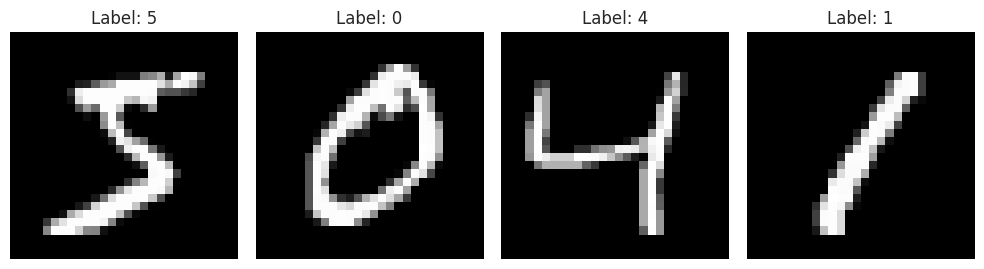

In [42]:
(X_big_dataset, y_big_dataset), (_, _) = mnist.load_data()
print(X_big_dataset.shape)

plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_big_dataset[i], cmap='gray')
    plt.title(f"Label: {y_big_dataset[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

X_big_dataset = X_big_dataset.reshape(X_big_dataset.shape[0], -1)


N_SAMPLES = 3000
indices = np.random.choice(X_big_dataset.shape[0], N_SAMPLES, replace=False)
X_sub = X_big_dataset[indices]
y_sub = X_big_dataset[indices]


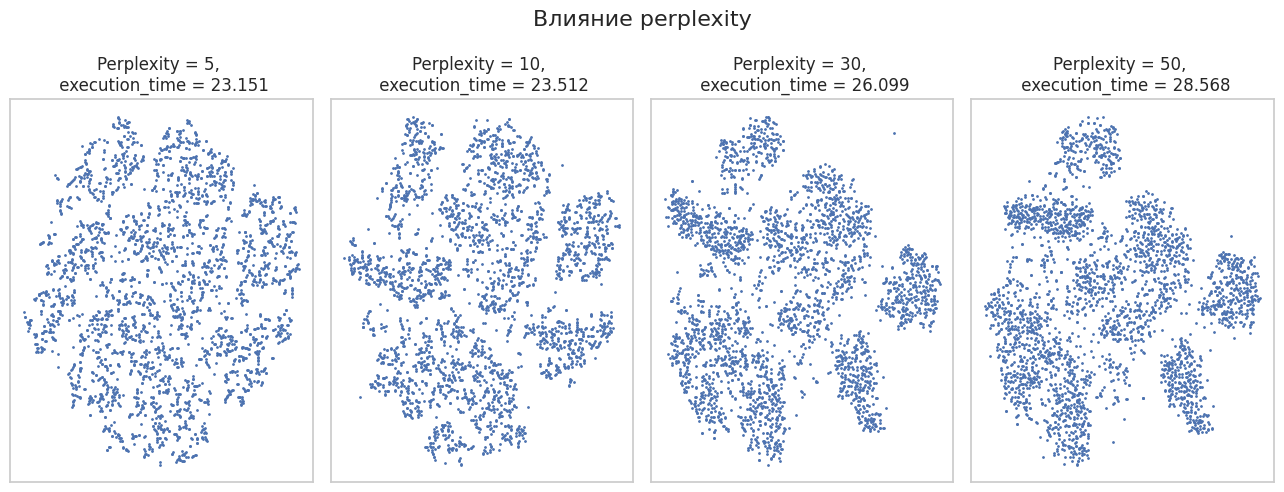

In [49]:
perplexities = [5, 10, 30, 50]

experiment_perplexity(X_sub, perplexities)

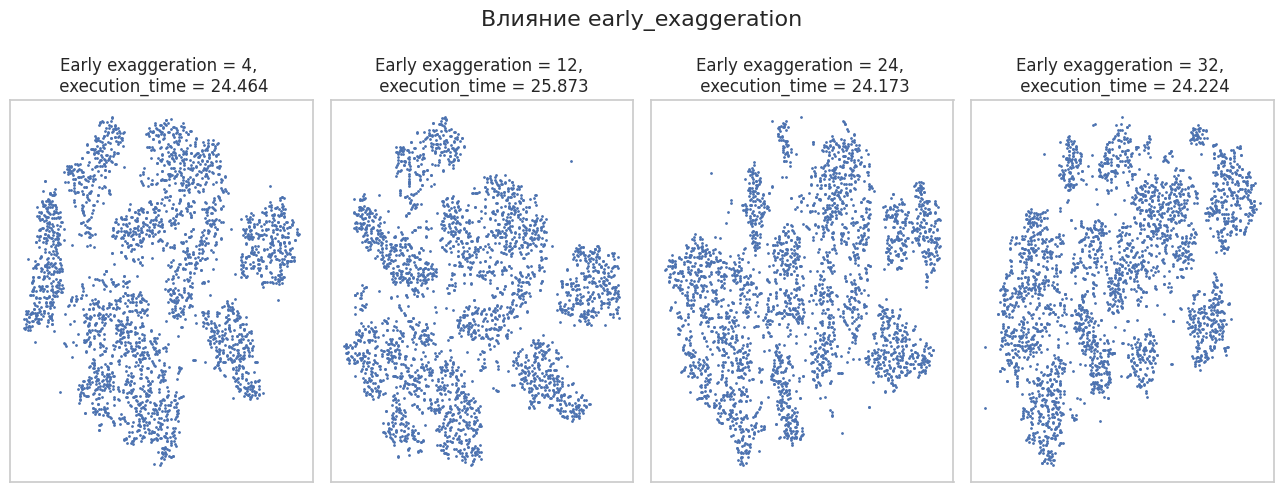

In [50]:
experiment_early_exaggeration(X_sub, [4, 12, 24, 32])

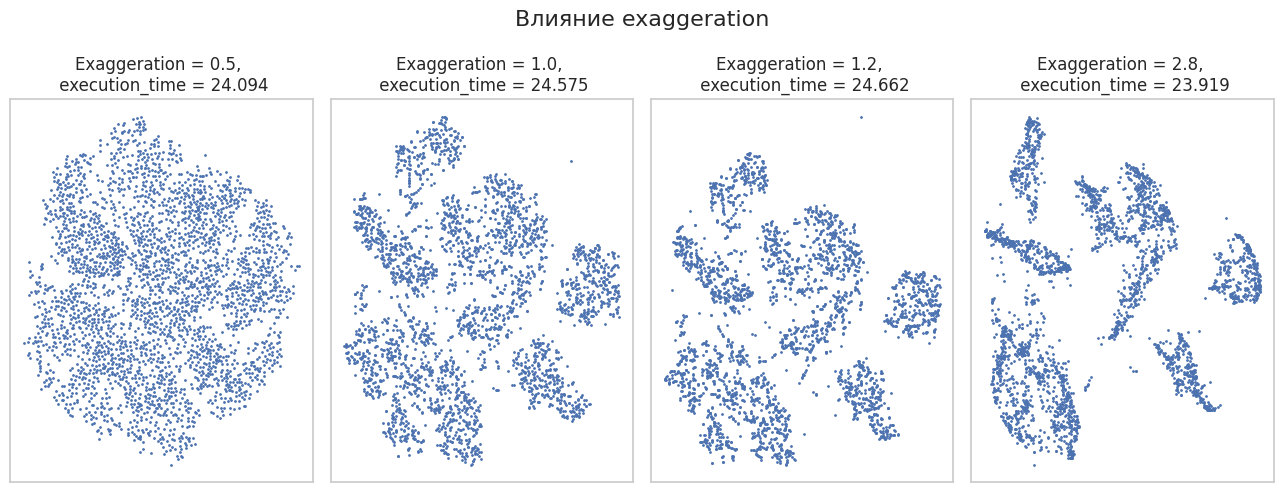

In [51]:
experiment_exaggeration(X_sub, [0.5, 1.0, 1.2, 2.8])

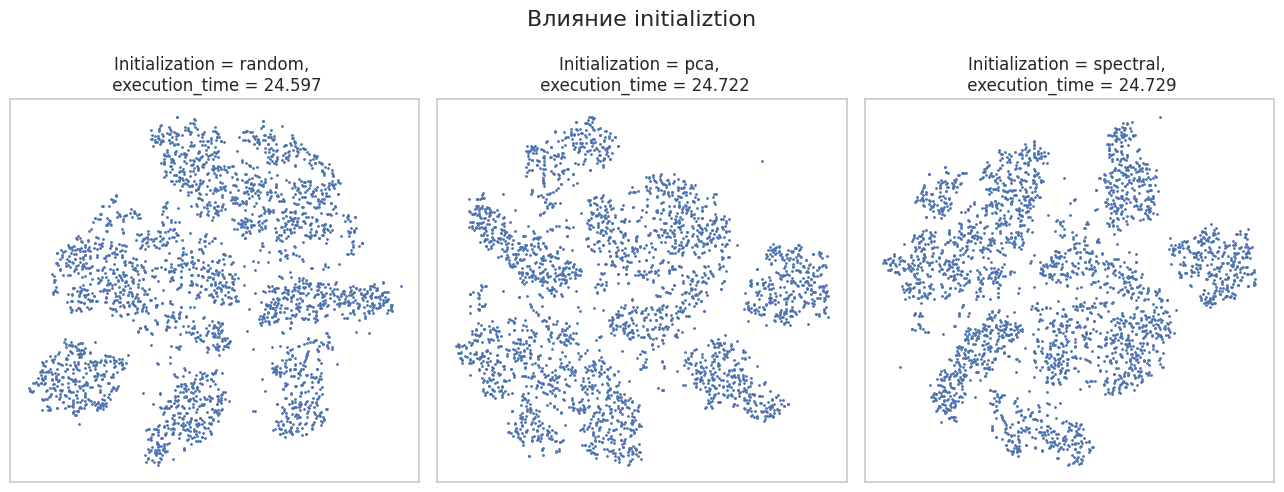

In [52]:
experiment_initialization(X_sub)

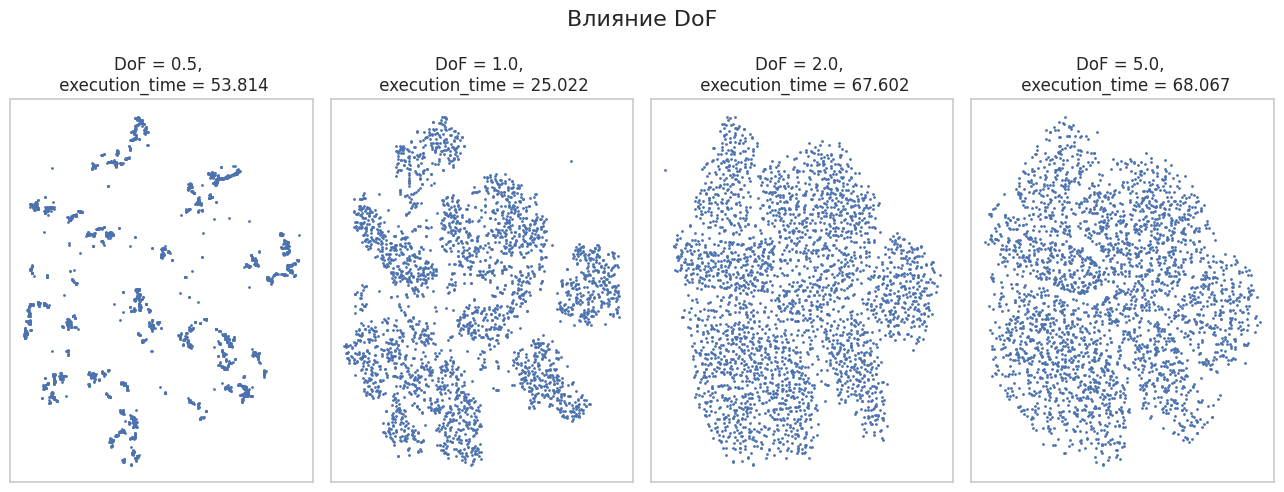

In [53]:
experiment_dof(X_sub, [0.5, 1.0, 2.0, 5.0])